### 步骤1 安装并引入必要的库

In [ ]:
!pip install click==7.1.2
!pip install dlib==19.19.0
!pip install dotmap==1.3.14
!pip install face-recognition==1.3.0
!pip install face-recognition-models==0.3.0
!pip install numpy==1.18.4
!pip install opencv-python==4.2.0.34
!pip install Pillow==7.1.2
!pip install tqdm==4.46.0
!pip install wincertstore==0.2
!pip install imutils==0.5.3
!pip install requests==2.24.0
!pip install IPython==7.7.0

In [7]:
#从functions_needed.py文件中导入所有内容
from functions_needed import *  
from PIL import Image
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

### 步骤2 添加面罩例一（单脸）

In [2]:
#在args词典中传入图片路径和想添加的口罩类型。
#在这个例子里我们为图像添加一个青色的普通医用外科口罩。

args = {"code":"",                    #默认为空
        "color":"#00FFFF",            #定义颜色为青色
        "color_weight":0.5,           #颜色密度为0.5
        "feature":False,              #特征为False
        "mask_type":"surgical",       #口罩类型为surgical（外科口罩）
        "path":"YoshuaB.jpg",         #图片路径（请确保输入的图片是jpg或png格式）
        "pattern":"",                 #样式为空
        "patten_weight":0.5,          #样式密度为0.5
        "verbose":True,               #"verbose":True
        "write_original_image":True}  #"write_original_image":True

In [3]:
#向args词典里添加detector键，通过dlib工具包获取面部数据信息
args["detector"] = dlib.get_frontal_face_detector() 
#提供dlib路径
path_to_dlib_model = "dlib_models/shape_predictor_68_face_landmarks.dat"
#第一次使用时载入模型
if not os.path.exists(path_to_dlib_model):
    download_dlib_model()
#向args词典里添加predictor键
args["predictor"] = dlib.shape_predictor(path_to_dlib_model)           

In [4]:
#读取code里的内容（如果code不是空的话）
mask_code = "".join(args['code'].split()).split(",")
#在args里添加code_count键
args['code_count'] = np.zeros(len(mask_code))
#在args里添加mask_dict_of_dict键
args['mask_dict_of_dict'] = {}

In [5]:
#读取mask_code的内容
for i, entry in enumerate(mask_code):
    #建立空词典
    mask_dict = {}   
    #口罩颜色为空string
    mask_color = ""   #口罩颜色为空string
    mask_texture = ""   #口罩质地为空string
    mask_type = entry.split("-")[0]   #口罩类型为mask_code里的entry

    if len(entry.split("-")) == 2:    #
        mask_variation = entry.split("-")[1]
        if "#" in mask_variation:
            mask_color = mask_variation
        else:
            mask_texture = mask_variation

    mask_dict["type"] = mask_type  #在mask_dict里建立‘type’键，输入值mask_type？
    mask_dict["color"] = mask_color 
    mask_dict["texture"] = mask_texture
    args['mask_dict_of_dict'][i] = mask_dict #把mask_dict存入mask_dict_of_dict里

In [8]:
#确保是png或者jpg图像文件
masked_image, mask, mask_binary_array, original_image = mask_image(
            'YoshuaB.jpg', args
        )
for i in range(len(mask)):
    img = masked_image[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

检测到人脸数:  1


### 步骤3 添加面罩例二（多脸）

In [15]:
# 请在这里填写您的代码

args = {"code":"cloth-masks/textures/check/check_4.jpg, cloth-masks/textures/others/heart_1.png",
        "color":"#00FFFF",
        "color_weight":0.3,
        "feature":False,
        "mask_type":"N95", 
        "path":"big_bang_theory.jpg",
        "pattern":"",
        "pattern_weight":0.2,
        "verbose":True,
        "write_original_image":True}

In [16]:
# 请在这里填写您的代码

args["detector"] = dlib.get_frontal_face_detector()     
path_to_dlib_model = "dlib_models/shape_predictor_68_face_landmarks.dat"

if not os.path.exists(path_to_dlib_model):
    download_dlib_model()

args["predictor"] = dlib.shape_predictor(path_to_dlib_model)      

In [17]:
mask_code = "".join(args['code'].split()).split(",")
args['code_count'] = np.zeros(len(mask_code))
args['mask_dict_of_dict'] = {}

In [18]:
for i, entry in enumerate(mask_code):

    mask_dict = {}   #建立空词典
    mask_color = ""   #口罩颜色为空string
    mask_texture = ""   #口罩质地为空string
    mask_type = entry.split("-")[0]   #口罩类型为mask_code里的entry

    if len(entry.split("-")) == 2:    #
        mask_variation = entry.split("-")[1]
        if "#" in mask_variation:
            mask_color = mask_variation
        else:
            mask_texture = mask_variation

    mask_dict["type"] = mask_type  #在mask_dict里建立‘type’键，输入值mask_type？
    mask_dict["color"] = mask_color 
    mask_dict["texture"] = mask_texture
    args['mask_dict_of_dict'][i] = mask_dict #把mask_dict存入mask_dict_of_dict里

检测到人脸数:  5


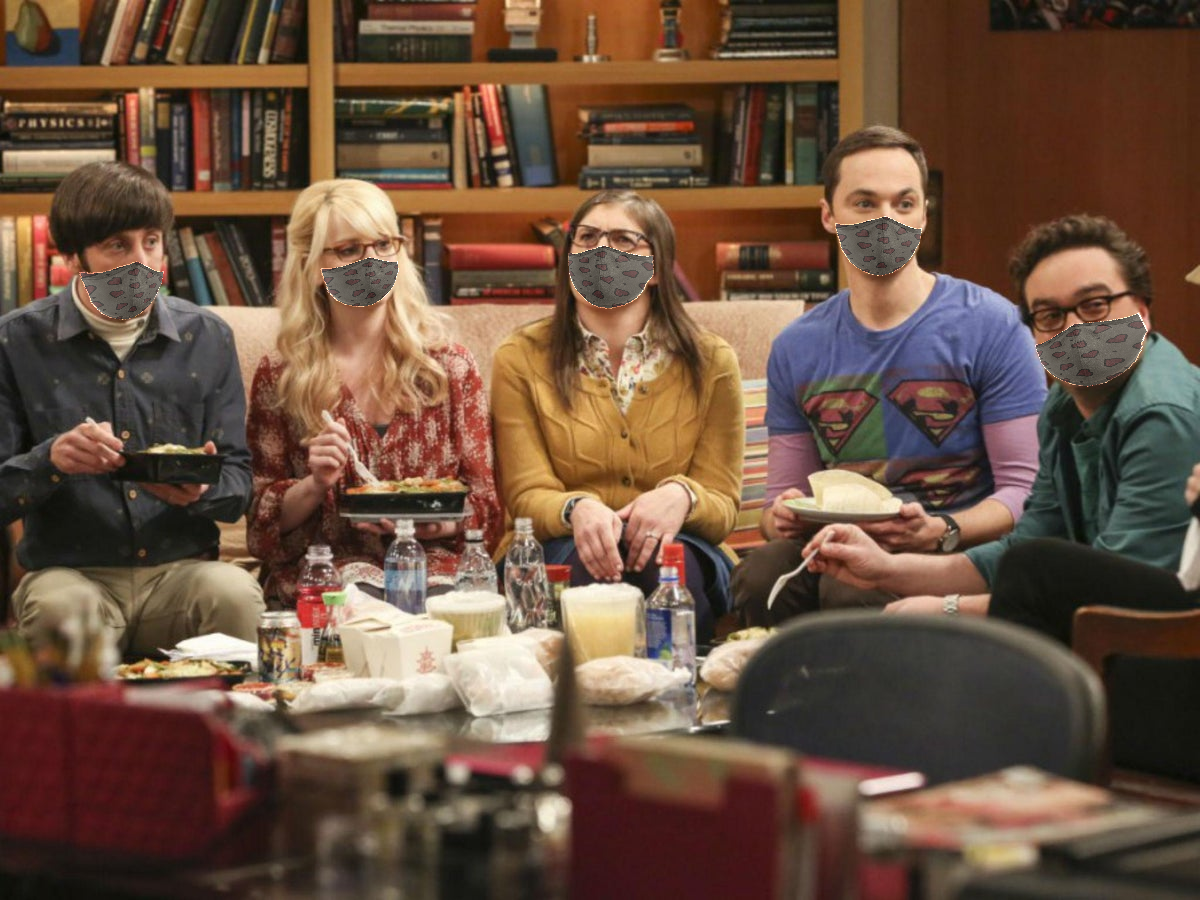

In [19]:
masked_image, mask, mask_binary_array, original_image = mask_image(
            'big_bang_theory.jpg', args
        )
for i in range(len(mask)):
    img = masked_image[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(img))

### 步骤4 试试看给自己的照片加口罩

In [ ]:
#在args词典中传入图片路径和想添加的口罩类型。
#在这个例子里我们为图像添加一个青色的普通医用外科口罩。

args = {"code":"", 
        #定义样式，默认为空
        "color":"#00FFFF",
        #定义颜色，可参考十六进制颜色表，填入希望呈现的颜色码
        "color_weight":0.5,           
        #颜色密度可以为0-1之间的小数
        "feature":False,              
        #特征为False
        "mask_type":"surgical",       
        #口罩类型，可填入
        "path":"YoshuaB.jpg",         
        #图片路径（请确保输入的图片是jpg或png格式）
        "pattern":"",                 
        #样式为空
        "patten_weight":0.5,  
        #样式密度可以为0-1之间的小数
        "verbose":True,               
        "write_original_image":True}  